# Breast Cancer Prediction - Unsupervised Learning
### Name: Burhan Hadi Butt
### Enrollment: 03-134211-008
### Class: BSCS - 8A

## Import Libraries

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

## Load the Dataset

**Attribute Information:**
* ID number
* Diagnosis (M = malignant, B = benign)

**Ten real-valued features are computed for each cell nucleus:**
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

In [2]:
# Load the training and testing data
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/DM/Assignment 2/data.csv')

## Data Exploration

In [3]:
# First few rows of the dataset
print(dataset.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
# Information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Summary statistics
print(dataset.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

## Data Preprocessing

In [6]:
# Drop irrelevant columns
dataset.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [7]:
# Check for missing values
print(dataset.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [8]:
# Encode categorical columns
label_encoder = LabelEncoder()
dataset['diagnosis'] = label_encoder.fit_transform(dataset['diagnosis'])  # 'M' becomes 1, 'B' becomes 0

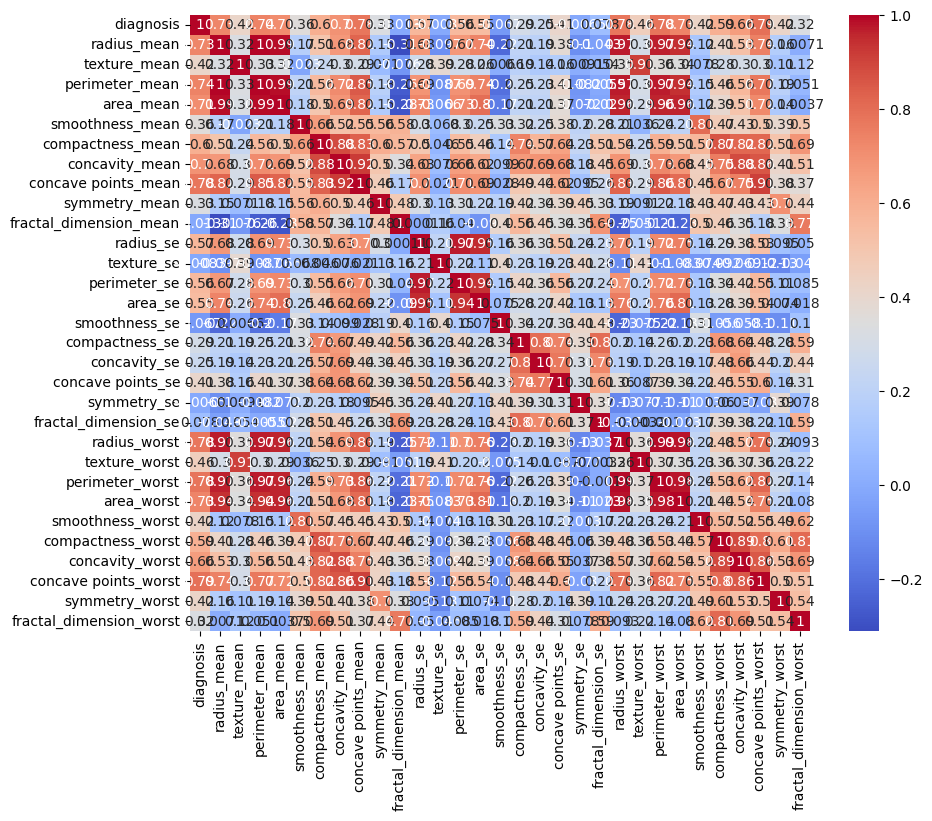

In [9]:
# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
# Scale the features
scaler = StandardScaler()
features = dataset.drop('diagnosis', axis=1)
target = dataset['diagnosis']
features_scaled = scaler.fit_transform(features)

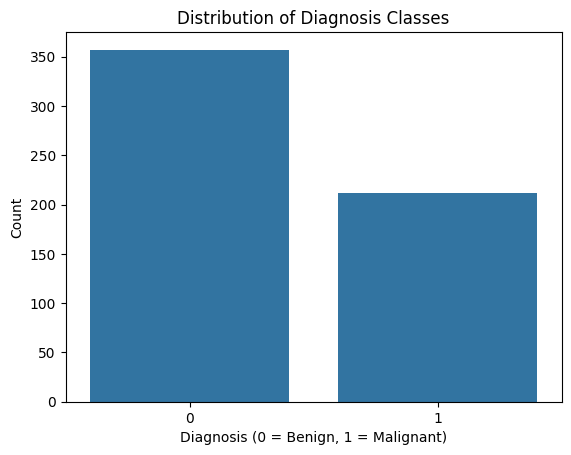

In [11]:
# Check the distribution of the target classes
sns.countplot(x='diagnosis', data=dataset)
plt.title('Distribution of Diagnosis Classes')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

## Model Training

#### K-Means Clustering

In [12]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(features_scaled)

In [13]:
# Silhouette Score for validation
silhouette_kmeans = silhouette_score(features_scaled, labels_kmeans)
print("Silhouette Score for K-Means:", silhouette_kmeans)

Silhouette Score for K-Means: 0.3447344346611054


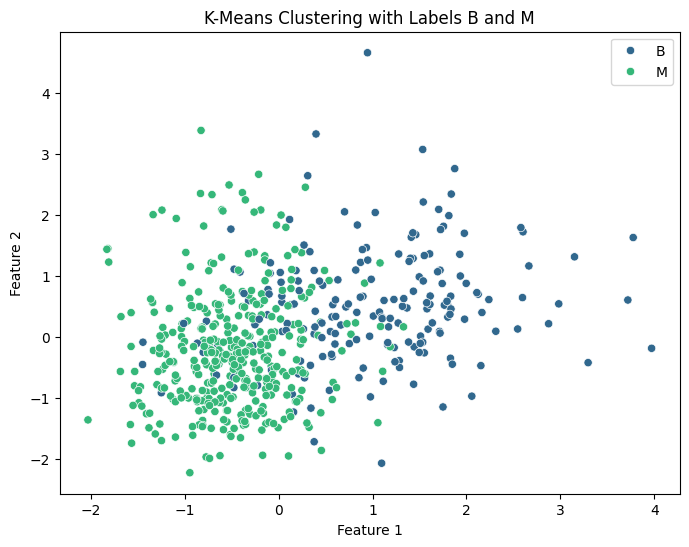

In [14]:
# Visualization
plt.figure(figsize=(8, 6))
labels_kmeans_named = np.where(labels_kmeans == 0, 'B', 'M')
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=labels_kmeans_named, palette='viridis')
plt.title('K-Means Clustering with Labels B and M')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Agglomerative Clustering

In [15]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_agglo = agglo.fit_predict(features_scaled)

In [16]:
# Silhouette Score for validation
silhouette_agglo = silhouette_score(features_scaled, labels_agglo)
print("Silhouette Score for Agglomerative Clustering:", silhouette_agglo)

Silhouette Score for Agglomerative Clustering: 0.33938477753669855


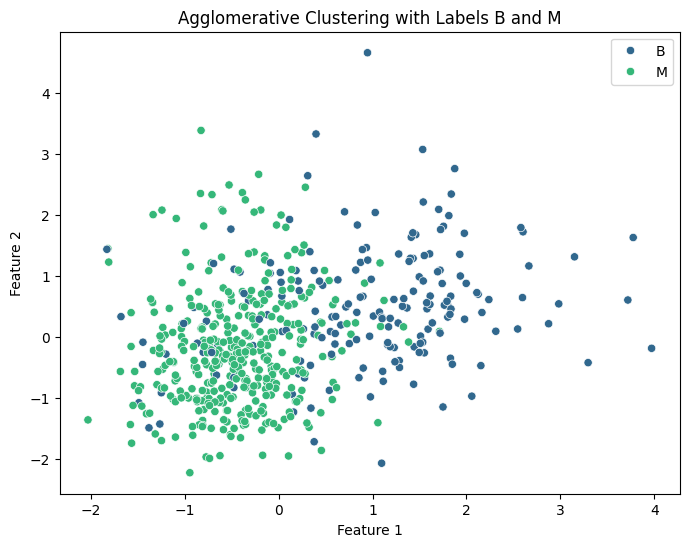

In [17]:
# Visualization
plt.figure(figsize=(8, 6))
labels_agglo_named = np.where(labels_agglo == 0, 'B', 'M')
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=labels_agglo_named, palette='viridis')
plt.title('Agglomerative Clustering with Labels B and M')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Model Evaluation

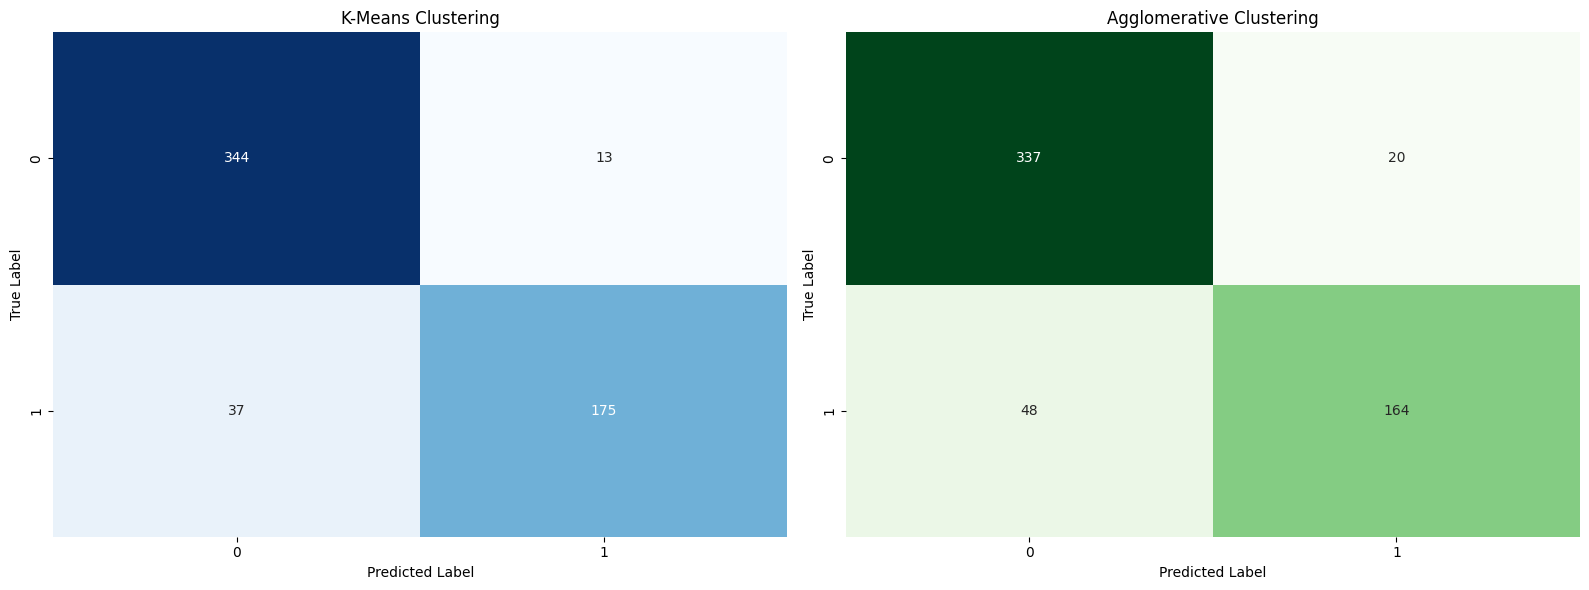

In [18]:
# Confusion Matrix

if target.dtypes != np.int64:
    target = target.map({'M': 1, 'B': 0}).astype(int)

def align_labels(true_labels, cluster_labels):
    new_labels = np.zeros_like(cluster_labels)
    for i in np.unique(cluster_labels):
        # Find the most common true label in each predicted cluster
        mask = (cluster_labels == i)
        true_labels_in_cluster = true_labels[mask]
        most_common_label = np.bincount(true_labels_in_cluster).argmax()
        new_labels[mask] = most_common_label
    return new_labels

# Align K-Means labels
aligned_labels_kmeans = align_labels(true_labels=target, cluster_labels=labels_kmeans)

# Align Agglomerative Clustering labels
aligned_labels_agglo = align_labels(true_labels=target, cluster_labels=labels_agglo)

# Create subplots to display both confusion matrices in the same row
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix for K-Means
cm_kmeans = confusion_matrix(target, aligned_labels_kmeans)
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion Matrix for Agglomerative Clustering
cm_agglo = confusion_matrix(target, aligned_labels_agglo)
sns.heatmap(cm_agglo, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('Agglomerative Clustering')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
# Accuracy Scores
print("Accuracy for K-Means:", accuracy_score(target, aligned_labels_kmeans))
print("Accuracy for Agglomerative Clustering:", accuracy_score(target, aligned_labels_agglo))

Accuracy for K-Means: 0.9121265377855887
Accuracy for Agglomerative Clustering: 0.8804920913884007


In [20]:
# Adjusted Rand Index
ari_kmeans = adjusted_rand_score(target, labels_kmeans)
ari_agglo = adjusted_rand_score(target, labels_agglo)
print("Adjusted Rand Index for K-Means:", ari_kmeans)
print("Adjusted Rand Index for Agglomerative Clustering:", ari_agglo)


Adjusted Rand Index for K-Means: 0.676504895633523
Adjusted Rand Index for Agglomerative Clustering: 0.5750409366326297


In [21]:
# Normalized Mutual Information
nmi_kmeans = normalized_mutual_info_score(target, labels_kmeans)
nmi_agglo = normalized_mutual_info_score(target, labels_agglo)
print("Normalized Mutual Information for K-Means:", nmi_kmeans)
print("Normalized Mutual Information for Agglomerative Clustering:", nmi_agglo)

Normalized Mutual Information for K-Means: 0.5620209362063814
Normalized Mutual Information for Agglomerative Clustering: 0.45691492004987216


## Conclusion

In this analysis, both K-Means and Agglomerative Clustering showed their strengths in grouping the data into clusters that partially aligned with the true labels (diagnosis). However, K-Means provided slightly better results in terms of overall accuracy and clustering quality as indicated by the evaluation metrics and confusion matrices.

## Exporting transformed dataset

In [22]:
# Convert scaled features to DataFrame
scaled_features_df = pd.DataFrame(features_scaled, columns=features.columns)

# Add the 'diagnosis' column to the scaled features DataFrame
scaled_features_df['diagnosis'] = target.values

# Save the DataFrame to a CSV file for use in the next notebook
scaled_features_df.to_csv('scaled_breast_cancer_dataset.csv', index=False)